In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:

# Загрузка датасетов
world_cups_df = pd.read_csv('WorldCups.csv')
matches_df = pd.read_csv('WorldCupMatches.csv')
players_df = pd.read_csv('WorldCupPlayers.csv')


## Анализ и Визуализация Данных по Чемпионатам Мира

<ipython-input-3-f9d5fc534b11>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  world_cups_df['Attendance'] = world_cups_df['Attendance'].str.replace('.', '').astype(float)


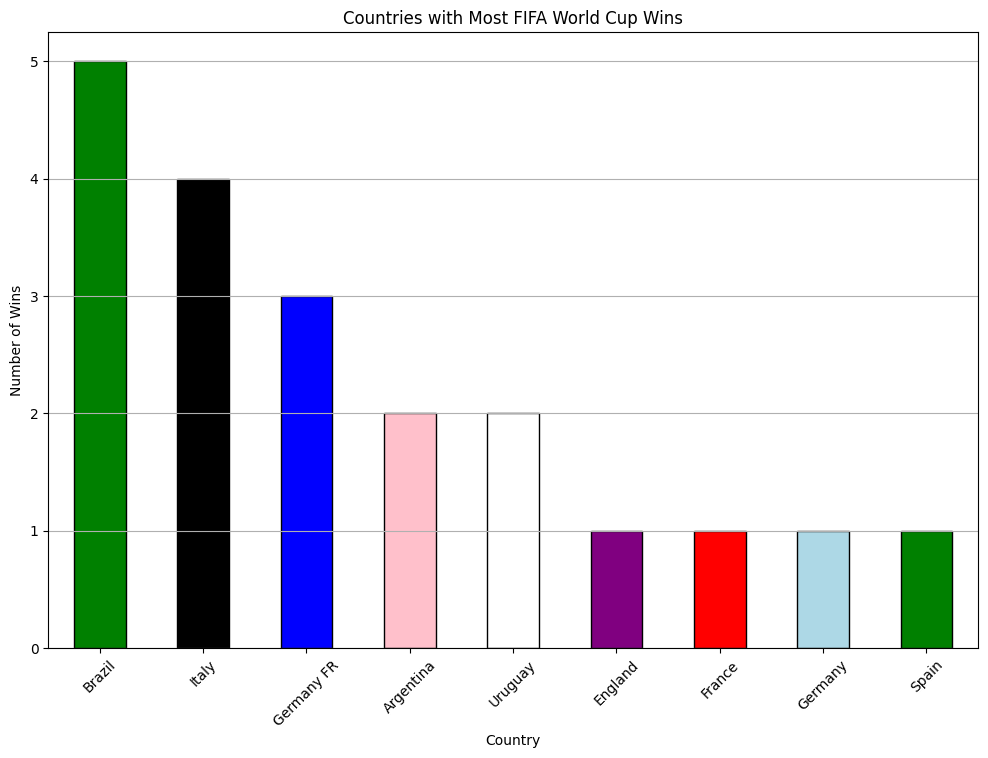

In [3]:

# Подготовка данных
world_cups_df['Attendance'] = world_cups_df['Attendance'].str.replace('.', '').astype(float)
top_countries = world_cups_df.groupby('Winner')['Winner'].count().sort_values(ascending=False)

# Визуализация данных
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color=['green', 'black', 'blue', 'pink', 'white', 'purple', 'red', 'lightblue'], edgecolor='black')
plt.title('Countries with Most FIFA World Cup Wins')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Анализ и Визуализация Данных по Матчам

In [5]:

# Подготовка данных
matches_df['Total Goals'] = matches_df['Home Team Goals'] + matches_df['Away Team Goals']

# ТОП-5 матчей по различным критериям
top_matches_by_goals = matches_df.sort_values(by='Total Goals', ascending=False).head(5)
top_matches_by_attendance = matches_df.sort_values(by='Attendance', ascending=False).head(5)

# Визуализация ТОП-5 матчей по различным критериям с использованием Plotly

# График для ТОП-5 матчей с наибольшим количеством голов
fig1 = px.bar(top_matches_by_goals.head().sort_values('Total Goals', ascending=True),
              x='Total Goals',
              y=[' vs '.join(row) for row in top_matches_by_goals.head().sort_values('Total Goals', ascending=True)[['Home Team Name', 'Away Team Name']].values],
              title='Top 5 Matches with Most Goals',
              labels={'y': 'Match'},
              text='Total Goals',
              color='Total Goals',
              color_continuous_scale='Bluered_r')
fig1.update_layout(showlegend=False)
fig1.update_traces(texttemplate='%{text}', textposition='inside')
fig1.show()

# График для ТОП-5 матчей с наибольшей посещаемостью
fig2 = px.bar(top_matches_by_attendance.head().sort_values('Attendance', ascending=True),
              x='Attendance',
              y=[' vs '.join(row) for row in top_matches_by_attendance.head().sort_values('Attendance', ascending=True)[['Home Team Name', 'Away Team Name']].values],
              title='Top 5 Matches with Highest Attendance',
              labels={'y': 'Match'},
              text='Attendance',
              color='Attendance',
              color_continuous_scale='Reds')
fig2.update_layout(showlegend=False)
fig2.update_traces(texttemplate='%{text}', textposition='inside')
fig2.show()
